<a href="https://colab.research.google.com/github/ori112/california_housing_predictions/blob/main/california_housing_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#California housing data set
this project will explore this data set using various types of models to predict median house value

In [15]:
#impotring libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats

In [16]:
#importing data set
df = pd.read_csv(r"/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
#filling missing data for bedrooms with 0
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
#statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


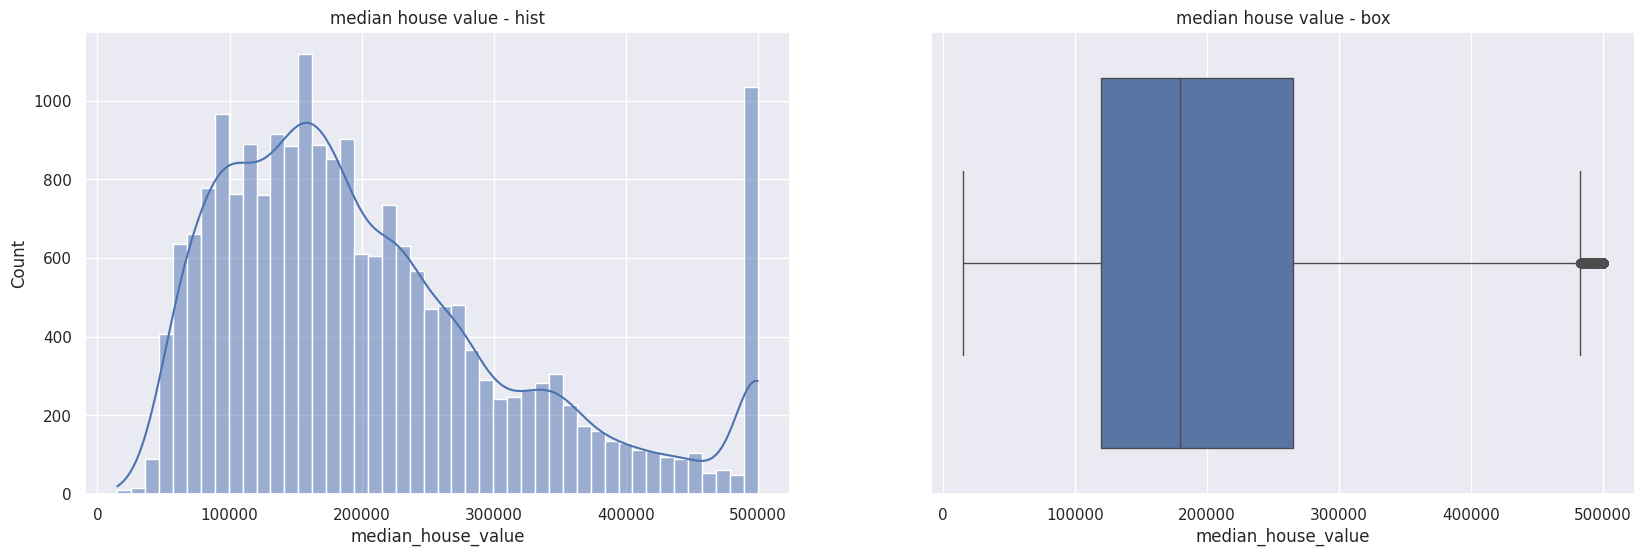

In [20]:
#inspecting the distributuion of the target label

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x="median_house_value", kde=True)
plt.title("median house value - hist")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="median_house_value")
plt.title("median house value - box")

plt.show()

as can be seen above there is a right tale wing at around 500K median value which seems to be outliers and skew the distribution.<br>
before cleaning this outliers, we will explore our data set further

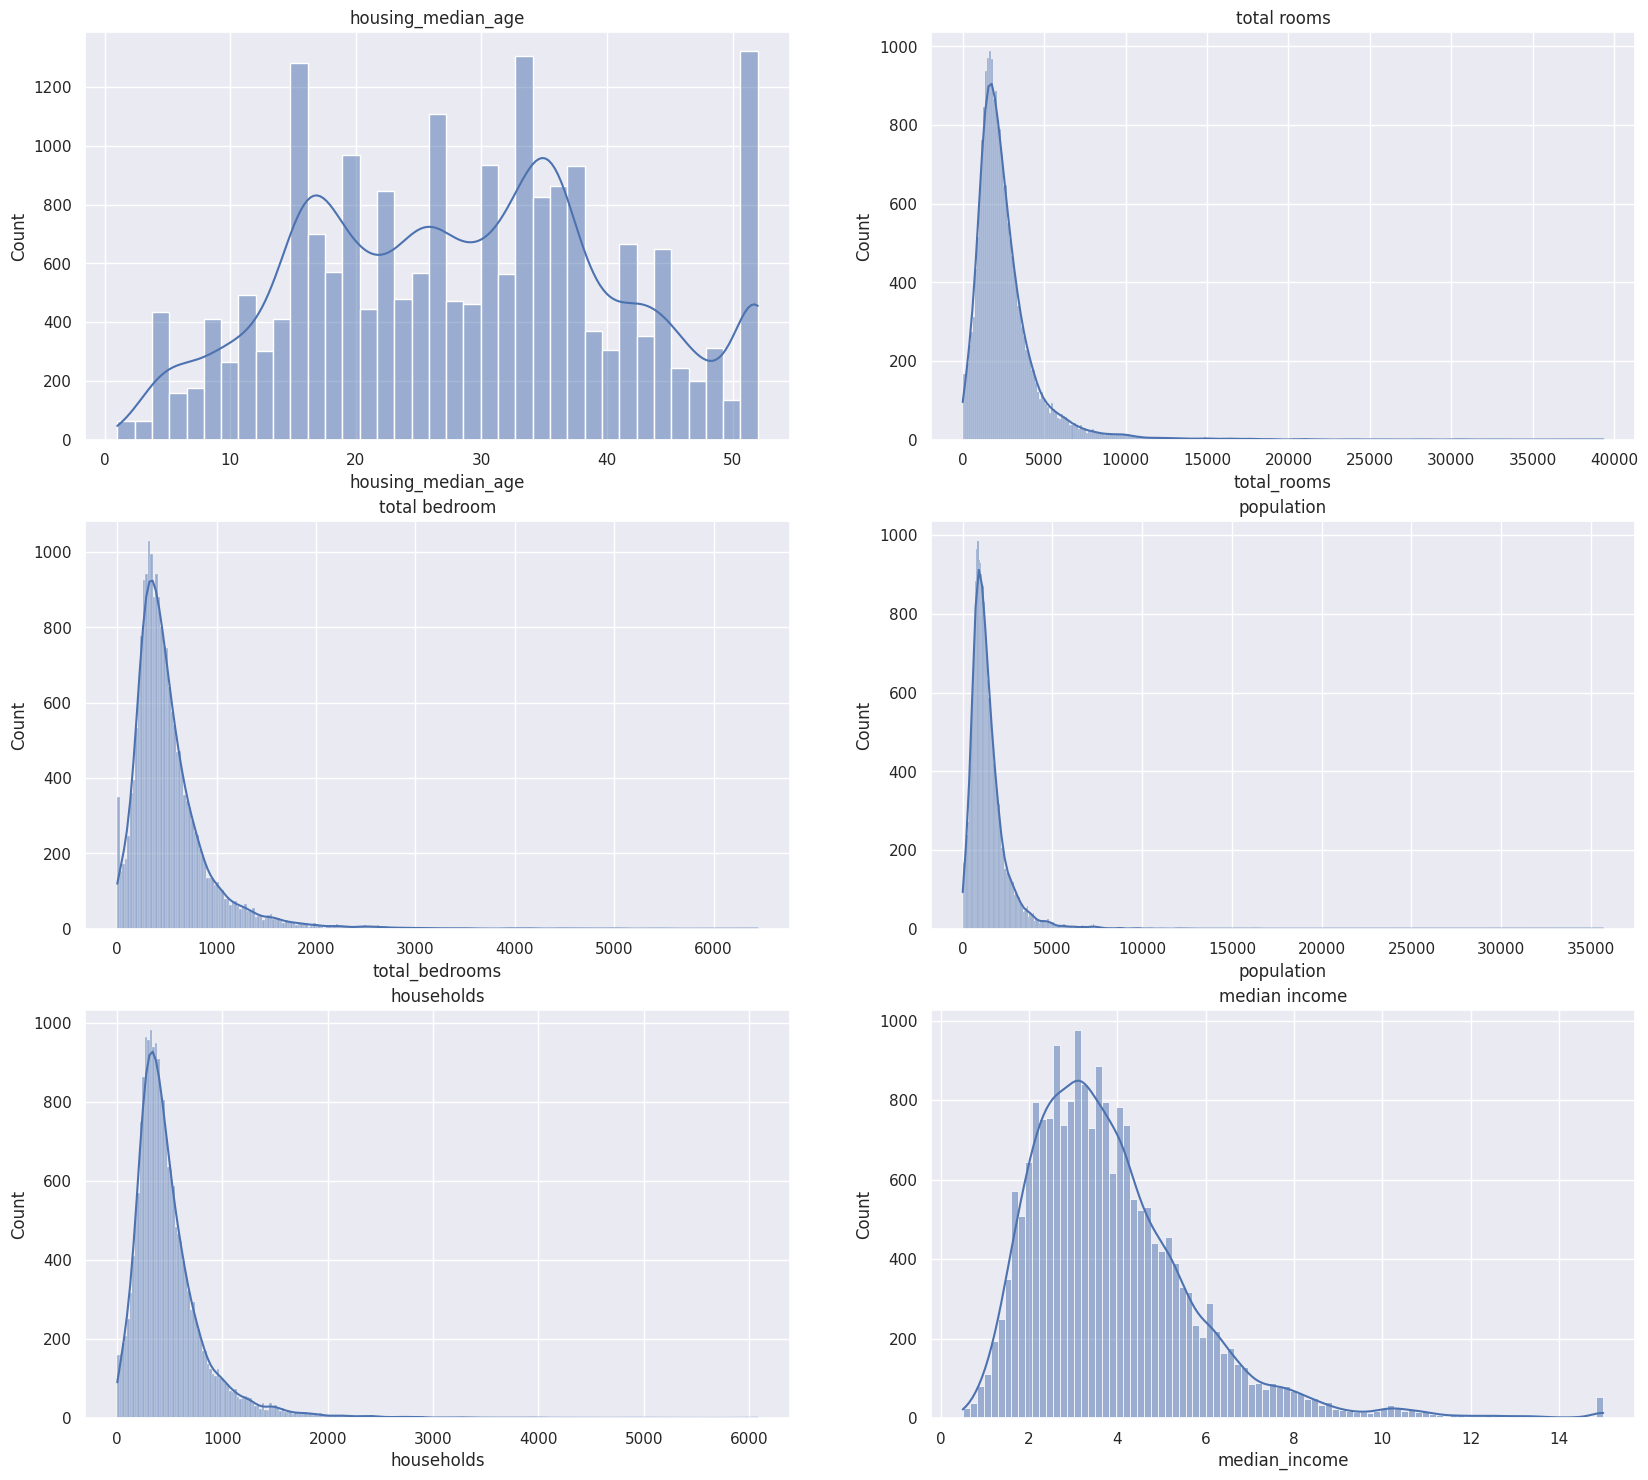

In [21]:
#inspecting the distributuion of diffrenet features

plt.figure(figsize=(20,18))

plt.subplot(3,2,1)
sns.histplot(data=df, x="housing_median_age", kde=True)
plt.title("housing_median_age")

plt.subplot(3,2,2)
sns.histplot(data=df, x="total_rooms", kde=True)
plt.title("total rooms")

plt.subplot(3,2,3)
sns.histplot(data=df, x="total_bedrooms", kde=True)
plt.title("total bedroom")

plt.subplot(3,2,4)
sns.histplot(data=df, x="population", kde=True)
plt.title("population")

plt.subplot(3,2,5)
sns.histplot(data=df, x="households", kde=True)
plt.title("households")

plt.subplot(3,2,6)
sns.histplot(data=df, x="median_income", kde=True)
plt.title("median income")

plt.show()

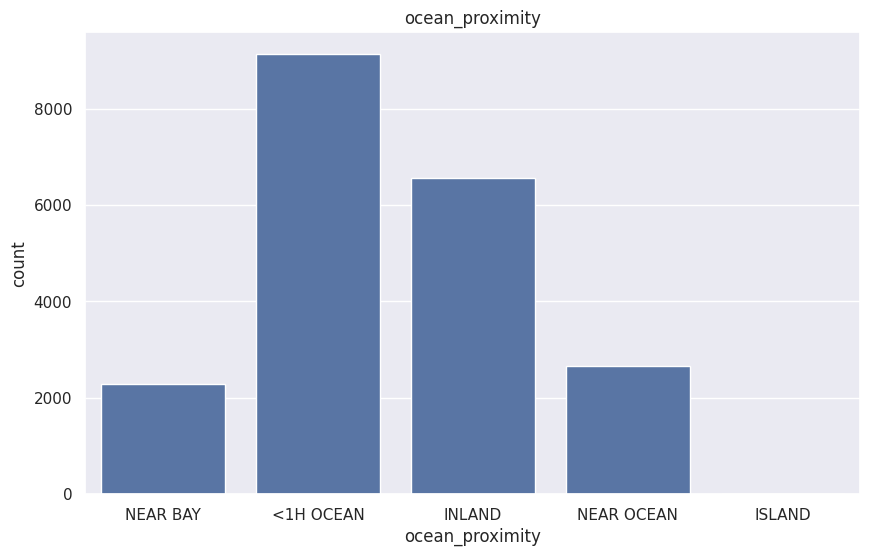

In [22]:
#inspecting the values of ocean_proximity categorial variable

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="ocean_proximity")
plt.title("ocean_proximity")
plt.show()

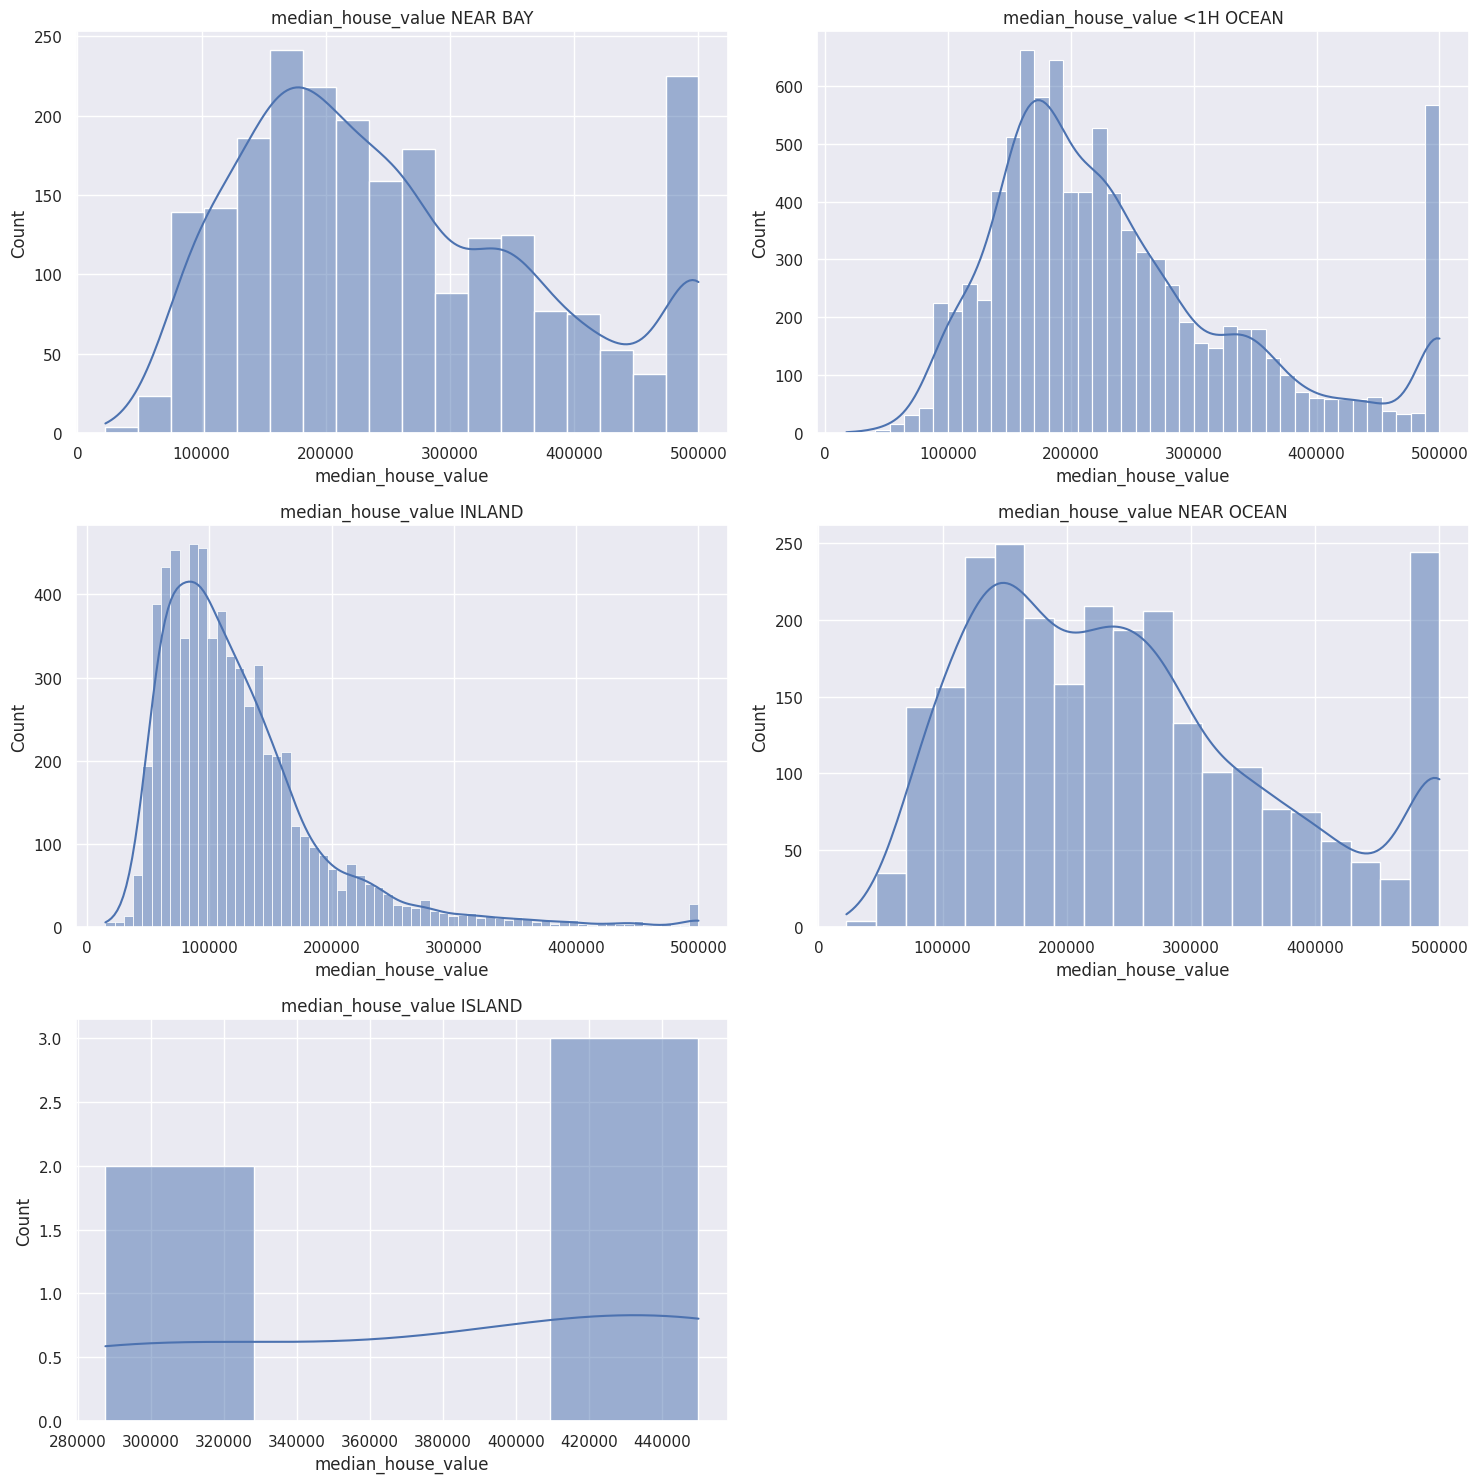

In [23]:
#inspecting target distribution for each type of ocean_proximity

unique_ocean_proximity = df["ocean_proximity"].unique()
num_unique = len(unique_ocean_proximity)

num_cols = 2
num_rows = (num_unique + num_cols - 1) // num_cols

plt.figure(figsize=(15, 15))

for idx, i in enumerate(unique_ocean_proximity):
    df_viz = df[df["ocean_proximity"] == i]
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.histplot(data=df_viz, x="median_house_value", kde=True)
    plt.title(f"median_house_value {i}")

plt.tight_layout()
plt.show()

since we see the outliers of the variable are present on all ocean_proximity values except island which is very low<br>
we will drop the island records and clean outliers after<br>
we will filter out lower boundry though not necessary just for consistency

In [24]:
#dropping island records

df = df[df["ocean_proximity"] != "ISLAND"]

#inspecting if filtering is successfull

df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN'], dtype=object)

In [25]:
#finding IQR

Q1 = df["median_house_value"].quantile(0.25)
Q3 = df["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

print(f"Q3: {Q3}")
print(f"Q1: {Q1}")
print(f"IQR: {IQR}")

Q3: 264700.0
Q1: 119600.0
IQR: 145100.0


In [26]:
#Defining boundaries

upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR

print(f"Upper boundary: {upper_boundary}")
print(f"Lower boundary: {lower_boundary}")

Upper boundary: 482350.0
Lower boundary: -98050.0


In [27]:
#filtering out the outliers

df_cleaned = df[(df["median_house_value"] <= upper_boundary) & (df["median_house_value"] >= lower_boundary)]

print(f"original shape: {df.shape}")
print(f"cleaned shape: {df_cleaned.shape}")

#assigning df_cleand back to df

df = df_cleaned
print(f"after assignment shape: {df.shape}")

original shape: (20635, 10)
cleaned shape: (19564, 10)
after assignment shape: (19564, 10)


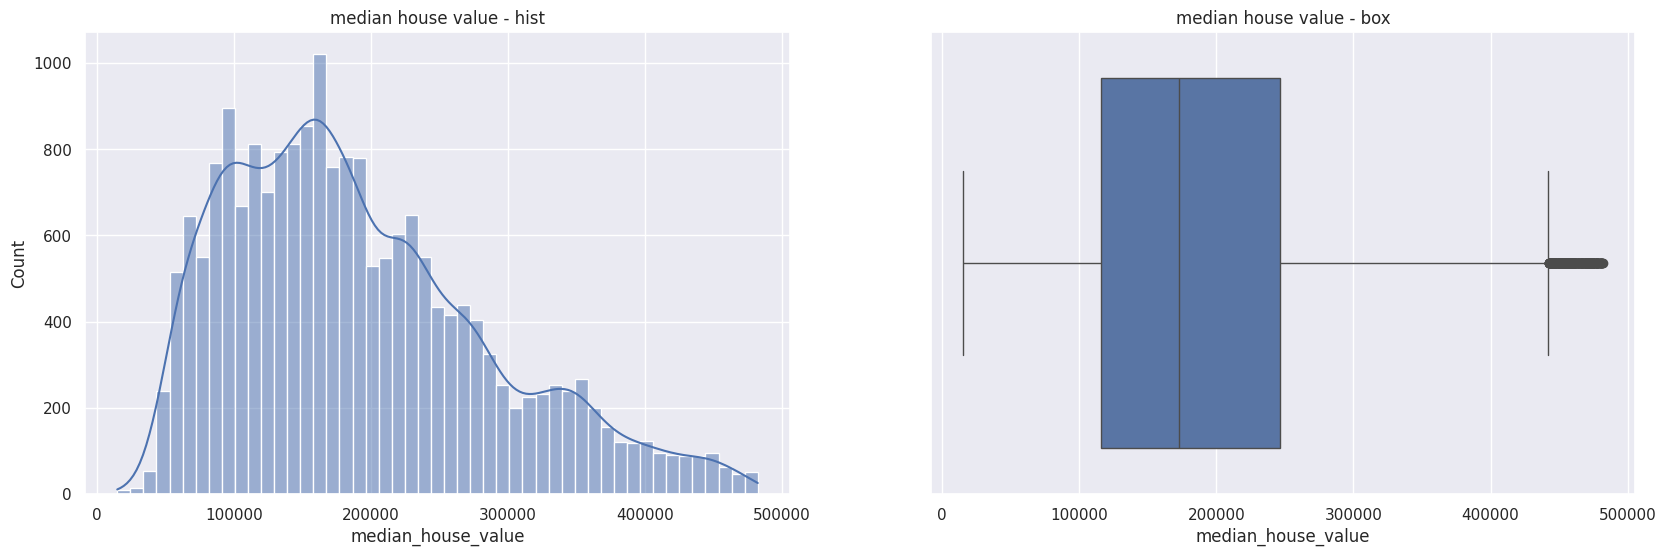

In [28]:
#inspecting the distributuion of the target label after filtering outliers

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x="median_house_value", kde=True)
plt.title("median house value - hist")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="median_house_value")
plt.title("median house value - box")

plt.show()

after cleaning we see we are left with more outliers on the cleand df.<br>
since we dont want to lose to many records, we will continue with the current data set

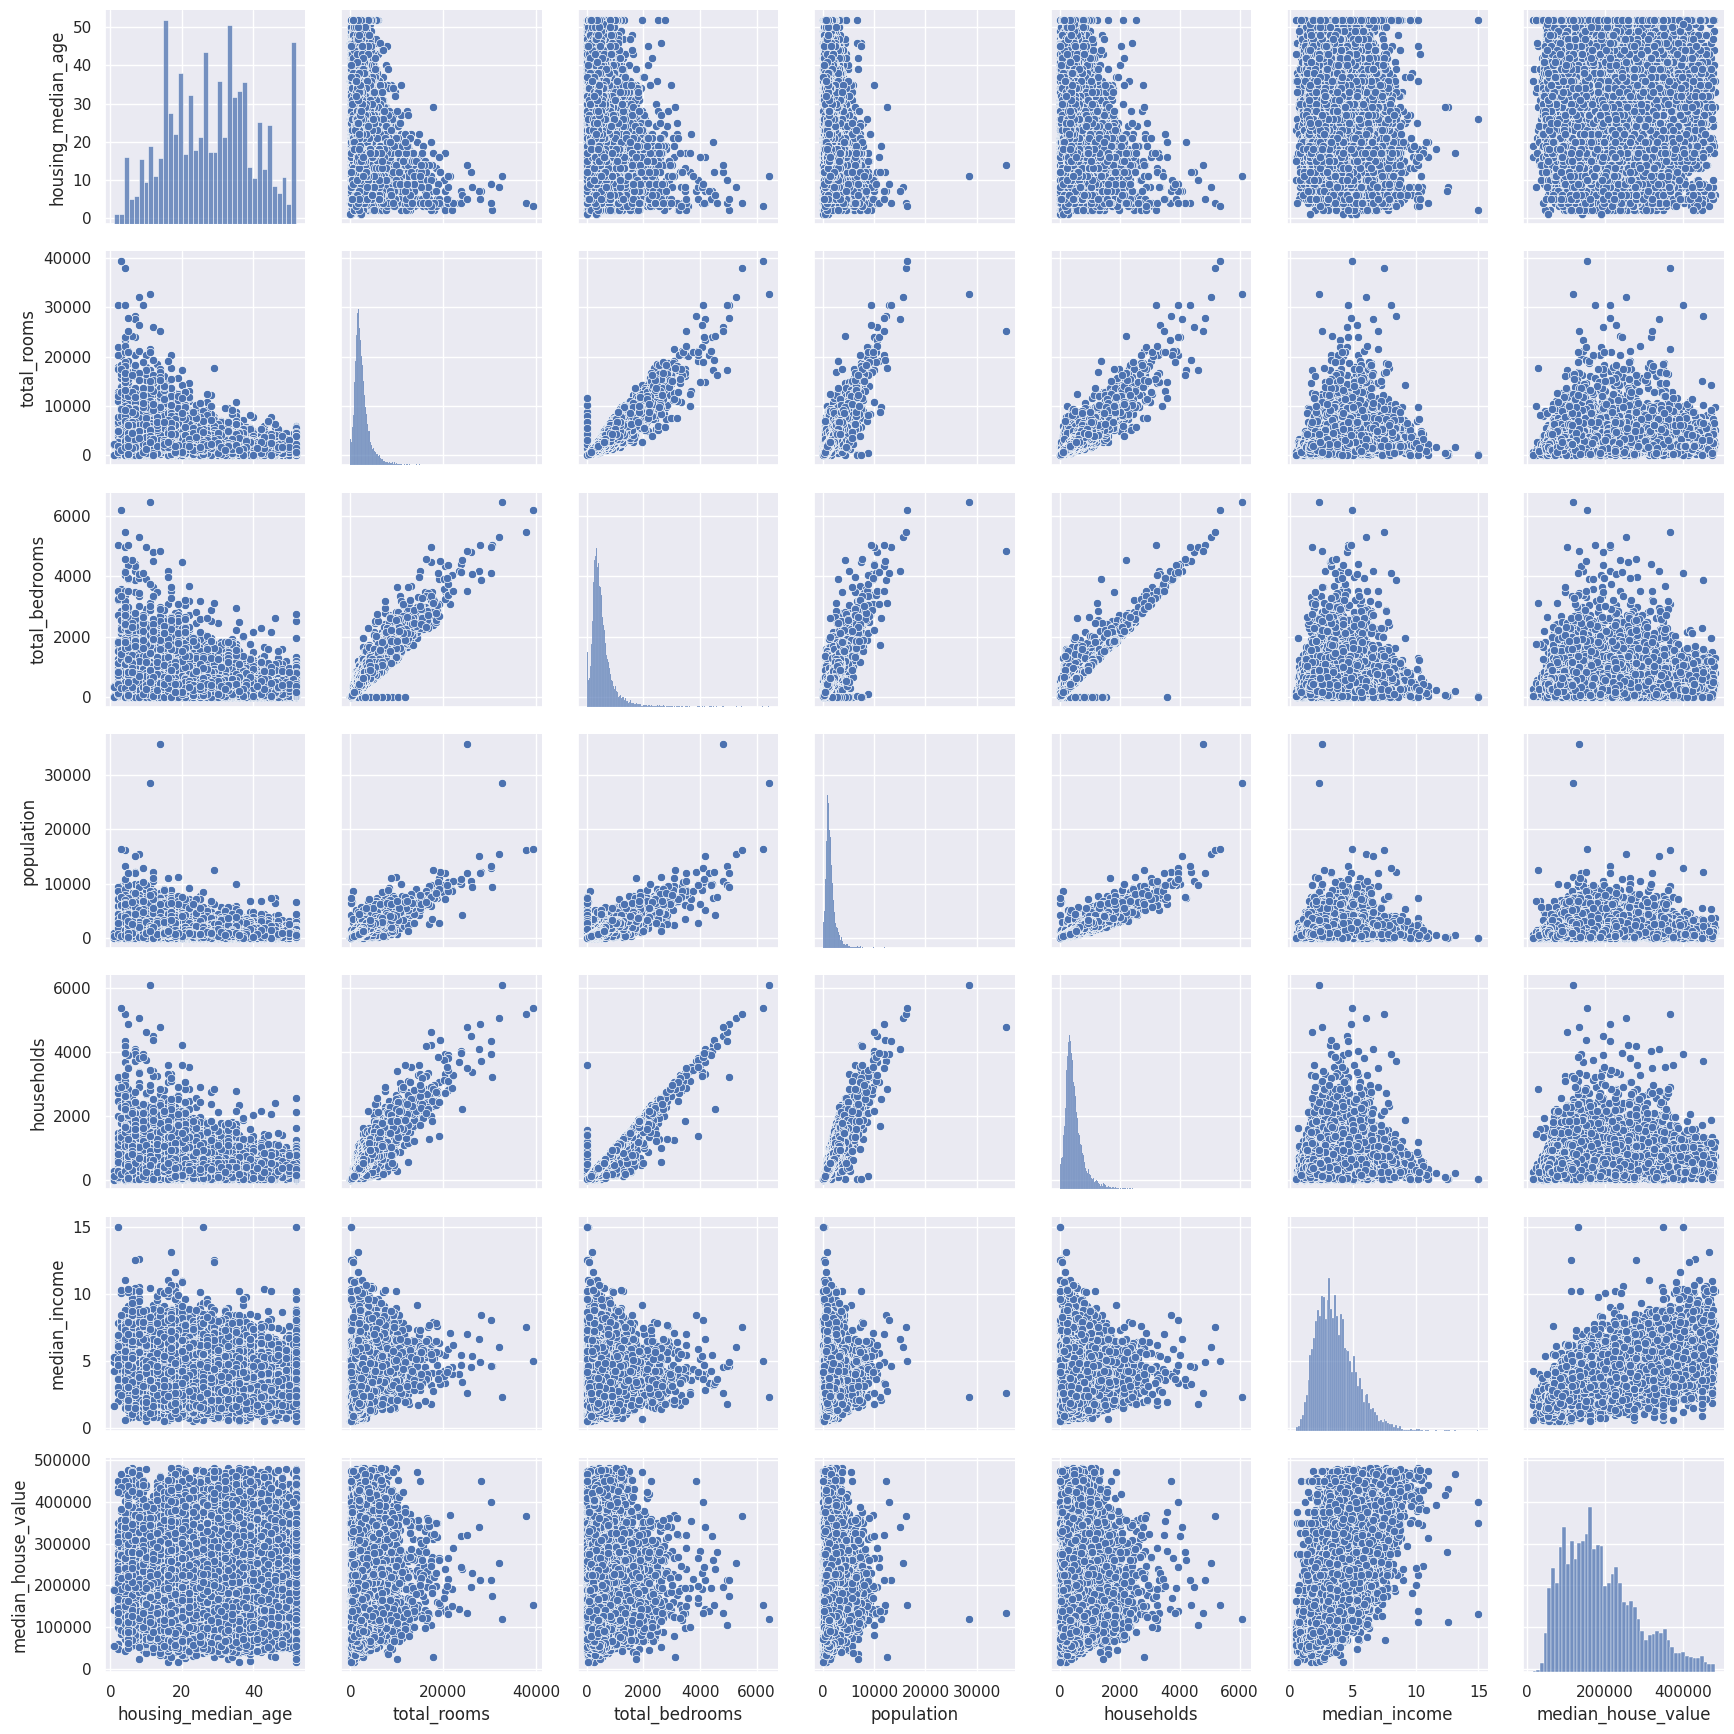

In [29]:
#inspecting correlations
numeric = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
sns.pairplot(data=df[numeric])
plt.tight_layout()
plt.show()

it is noticable the median house value is positivly correlated with median income.<br> the rest of the features seems not to have a linear relationship with median house value

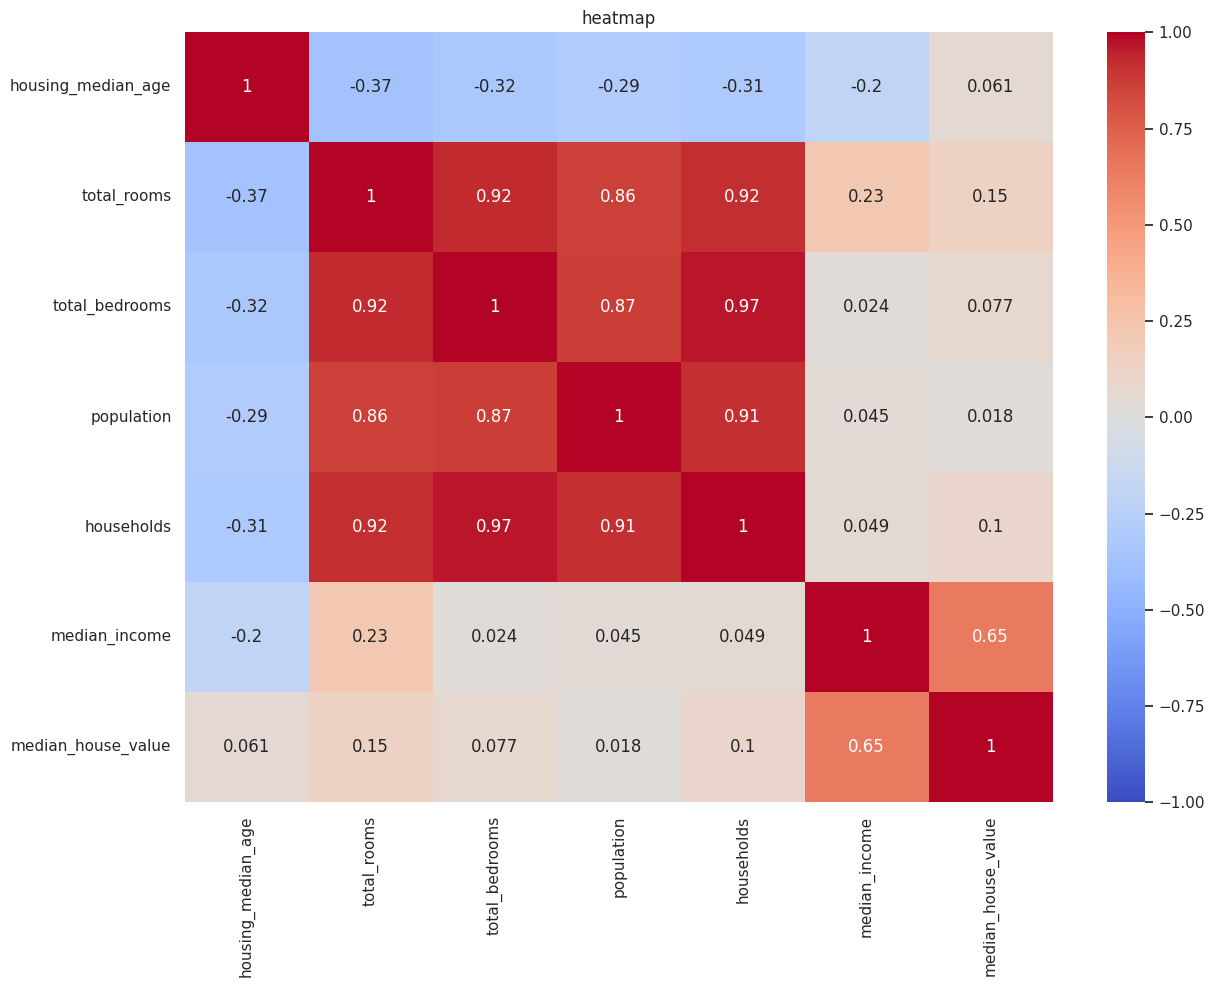

In [30]:
#generating heatmap

plt.figure(figsize=(14,10))
sns.heatmap(data=df[numeric].corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('heatmap')
plt.show()

once againm median income is noticable.<br>
rest of the features do not correlate linearly

In [31]:
#feature engineering

df['rooms_per_house'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_house'] = df['population'] / df['households']

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [32]:
#one hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [33]:
#inspecting the df after encoding
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_per_room,population_per_house,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,True,False


In [34]:
#splitting the data for features and target

X = df.drop(columns=('median_house_value'))
y = df['median_house_value']

#splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

#scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15651, 14)
X_test shape: (3913, 14)
y_train shape: (15651,)
y_test shape: (3913,)


#models
we will test several models in order to see what works best for us

####linear regression

In [ ]:
#fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)

#predicitng with model

pred_lr_train = lr.predict(X_train)
pred_lr_test = lr.predict(X_test)

#calculating metrics

rmse_train = np.sqrt(mean_squared_error(y_train, pred_lr_train))
r2_train = r2_score(y_train, pred_lr_train)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_lr_test))
r2_test = r2_score(y_test, pred_lr_test)

#printing scores

print(f"rmse train: {rmse_train}")
print(f"r2 train: {r2_train}")
print('----------------------------')
print('----------------------------')
print(f"rmse test: {rmse_test}")
print(f"r2 test: {r2_test}")

rmse train: 58767.4709775474
r2 train: 0.6196275527091487
----------------------------
----------------------------
rmse test: 58088.74327039153
r2 test: 0.6324690610607221


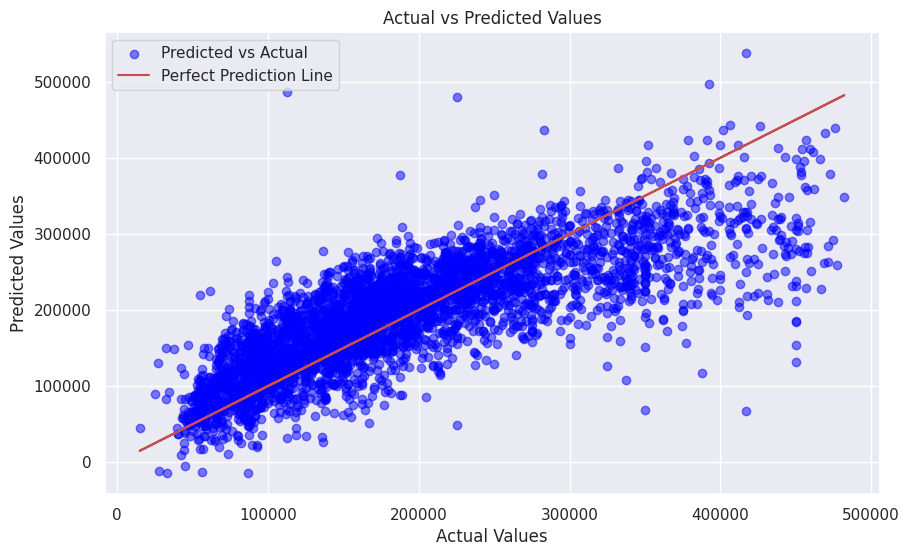

In [ ]:
# visualizing actual VS predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_lr_test, c="blue", alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

####decision tree

In [ ]:
#fitting the model

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

#predicitng with model

pred_dtr_train = dtr.predict(X_train)
pred_dtr_test = dtr.predict(X_test)

#calculating metrics

rmse_train = np.sqrt(mean_squared_error(y_train, pred_dtr_train))
r2_train = r2_score(y_train, pred_dtr_train)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_dtr_test))
r2_test = r2_score(y_test, pred_dtr_test)

#printing scores

print(f"rmse train: {rmse_train}")
print(f"r2 train: {r2_train}")
print('----------------------------')
print('----------------------------')
print(f"rmse test: {rmse_test}")
print(f"r2 test: {r2_test}")


rmse train: 0.0
r2 train: 1.0
----------------------------
----------------------------
rmse test: 61946.96882857592
r2 test: 0.5820252338517868


In [ ]:
#creating param_grid

param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [1, 'sqrt', 'log2']
}

In [ ]:
#training the lr_grid
dtr_grid = GridSearchCV(estimator = dtr, param_grid=param_grid, scoring ="neg_mean_squared_error", cv=5)

# Fit the dtr_grid
dtr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': [1, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
#Retrieve best parameters and best estimator
dtr_best_params = dtr_grid.best_params_
dtr_best_model = dtr_grid.best_estimator_

In [ ]:
#Evaluate best model
dtr_best_model_score = dtr_best_model.score(X_test, y_test)

In [ ]:
#predicting with dtr best model
pred_dtr_best = dtr_best_model.predict(X_test)

In [ ]:
#defining statistics
mse = mean_squared_error(y_test, pred_dtr_best)
r2 = r2_score(y_test, pred_dtr_best)
rmse = np.sqrt(mse)

In [ ]:
#observing statistics
print("(MSE) Mean Squared Error:", mse)
print("(RMSE) Root of Mean Squared Error:", rmse)
print("R-squared (R²):", r2)

(MSE) Mean Squared Error: 3503834698.446888
(RMSE) Root of Mean Squared Error: 59193.19807585064
R-squared (R²): 0.6183602948241866


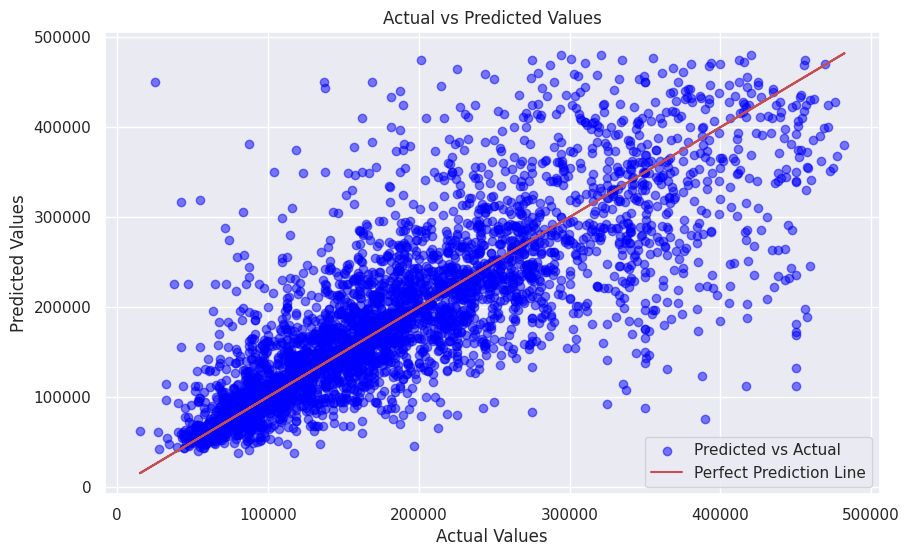

In [ ]:
# visualizing actual VS predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_dtr_test, c="blue", alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

####KNN

In [85]:
#fitting the model

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

#predicitng with model

pred_knn_train = knn.predict(X_train)
pred_knn_test = knn.predict(X_test)

#calculating metrics

rmse_train = np.sqrt(mean_squared_error(y_train, pred_knn_train))
r2_train = r2_score(y_train, pred_knn_train)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_knn_test))
r2_test = r2_score(y_test, pred_knn_test)

#printing scores

print(f"rmse train: {rmse_train}")
print(f"r2 train: {r2_train}")
print('----------------------------')
print('----------------------------')
print(f"rmse test: {rmse_test}")
print(f"r2 test: {r2_test}")


rmse train: 43781.81466972572
r2 train: 0.7888833118961521
----------------------------
----------------------------
rmse test: 53176.06785338538
r2 test: 0.6920059104462488


In [86]:
# Define the parameter grid for GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [87]:
# Initialize GridSearchCV
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)

# Fit the GridSearchCV
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [88]:
# Retrieve best parameters and best estimator
knn_best_params = knn_grid.best_params_
knn_best_model = knn_grid.best_estimator_

In [89]:
# Evaluate best model
knn_best_model_score = knn_best_model.score(X_test, y_test)

In [90]:
# Predict with the best model
pred_knn_best = knn_best_model.predict(X_test)

In [91]:
# Define statistics
mse = mean_squared_error(y_test, pred_knn_best)
r2 = r2_score(y_test, pred_knn_best)
rmse = np.sqrt(mse)

In [92]:
# Observing statistics
print("(MSE) Mean Squared Error:", mse)
print("(RMSE) Root of Mean Squared Error:", rmse)
print("R2", r2)

(MSE) Mean Squared Error: 2780575775.277838
(RMSE) Root of Mean Squared Error: 52731.16512346222
R2 0.6971380757298792


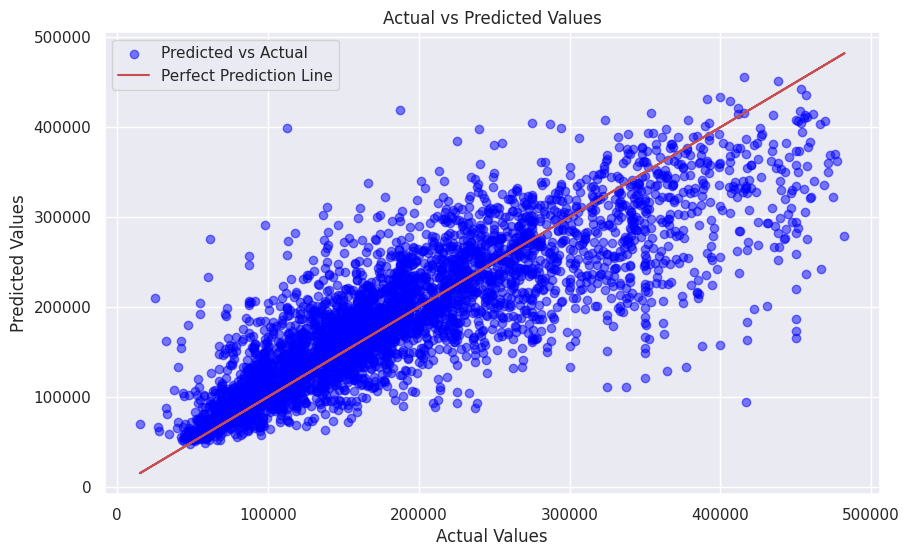

In [93]:
# visualizing actual VS predicted

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_knn_test, c="blue", alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

####random forest

In [94]:
#fitting the model

rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

#predicitng with model

pred_rfc_train = rfc.predict(X_train)
pred_rfc_test = rfc.predict(X_test)

#calculating metrics

rmse_train = np.sqrt(mean_squared_error(y_train, pred_rfc_train))
r2_train = r2_score(y_train, pred_rfc_train)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_rfc_test))
r2_test = r2_score(y_test, pred_rfc_test)

#printing scores

print(f"rmse train: {rmse_train}")
print(f"r2 train: {r2_train}")
print('----------------------------')
print('----------------------------')
print(f"rmse test: {rmse_test}")
print(f"r2 test: {r2_test}")


rmse train: 16473.880868296877
r2 train: 0.9701099329106122
----------------------------
----------------------------
rmse test: 44005.874909025675
r2 test: 0.7890734436209677


In [95]:
#creating param_grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 'sqrt', 'log2']
}


In [96]:
#training the lr_grid
rfc_grid = GridSearchCV(estimator = rfc, param_grid=param_grid, scoring ="neg_mean_squared_error", cv=5)

# Fit the dtr_grid
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': [1, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [97]:
#Retrieve best parameters and best estimator
rfc_best_params = rfc_grid.best_params_
rfc_best_model = rfc_grid.best_estimator_

In [98]:
#Evaluate best model
rfc_best_model_score = rfc_best_model.score(X_test, y_test)

In [99]:
#predicting with dtr best model
pred_rfc_best = rfc_best_model.predict(X_test)

In [100]:
#defining statistics
mse = mean_squared_error(y_test, pred_rfc_best)
r2 = r2_score(y_test, pred_rfc_best)
rmse = np.sqrt(mse)

In [101]:
#observing statistics
print("(MSE) Mean Squared Error:", mse)
print("(RMSE) Root of Mean Squared Error:", rmse)
print("R-squared (R²):", r2)

(MSE) Mean Squared Error: 1917051761.6336768
(RMSE) Root of Mean Squared Error: 43784.14966210577
R-squared (R²): 0.791193611547671


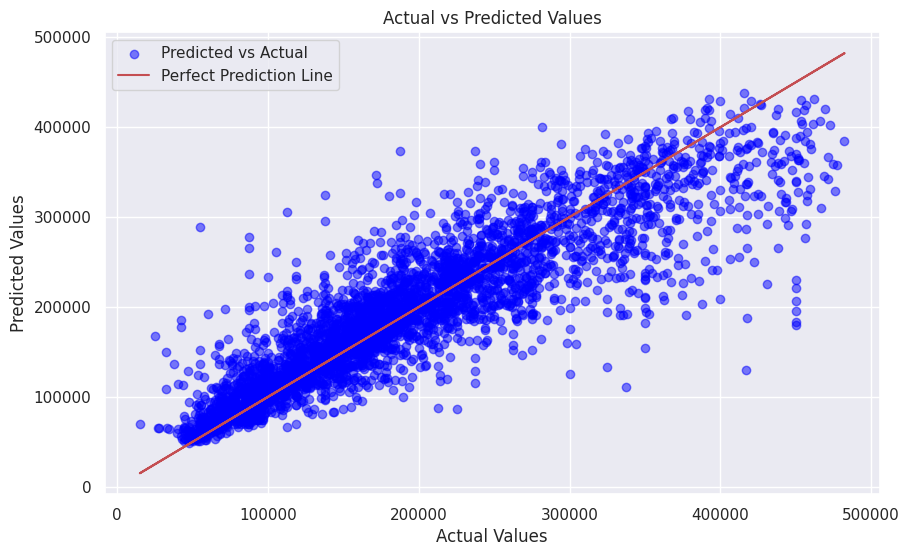

In [102]:
# visualizing actual VS predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_rfc_test, c="blue", alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

####gradient boosting

In [103]:
#fitting the model

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

#predicitng with model

pred_gbr_train = gbr.predict(X_train)
pred_gbr_test = gbr.predict(X_test)

#calculating metrics

rmse_train = np.sqrt(mean_squared_error(y_train, pred_gbr_train))
r2_train = r2_score(y_train, pred_gbr_train)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_gbr_test))
r2_test = r2_score(y_test, pred_gbr_test)

#printing scores

print(f"rmse train: {rmse_train}")
print(f"r2 train: {r2_train}")
print('----------------------------')
print('----------------------------')
print(f"rmse test: {rmse_test}")
print(f"r2 test: {r2_test}")

rmse train: 45561.926791392216
r2 train: 0.7713668438645229
----------------------------
----------------------------
rmse test: 47227.79081028512
r2 test: 0.75705654449314


In [104]:
# Define the parameter grid for GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [105]:
# Initialize GridSearchCV
gbr_grid = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)

# Fit the GridSearchCV
gbr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [106]:
# Retrieve best parameters and best estimator
gbr_best_params = gbr_grid.best_params_
gbr_best_model = gbr_grid.best_estimator_

In [107]:
# Evaluate best model
gbr_best_model_score = gbr_best_model.score(X_test, y_test)

In [108]:
# Predict with the best model
pred_gbr_best = gbr_best_model.predict(X_test)

In [109]:
# Define statistics
mse = mean_squared_error(y_test, pred_gbr_best)
r2 = r2_score(y_test, pred_gbr_best)
rmse = np.sqrt(mse)

In [110]:
# Observing statistics
print("(MSE) Mean Squared Error:", mse)
print("(RMSE) Root of Mean Squared Error:", rmse)
print("R2", r2)

(MSE) Mean Squared Error: 1649423094.8105426
(RMSE) Root of Mean Squared Error: 40613.0901903628
R2 0.8203438809791171


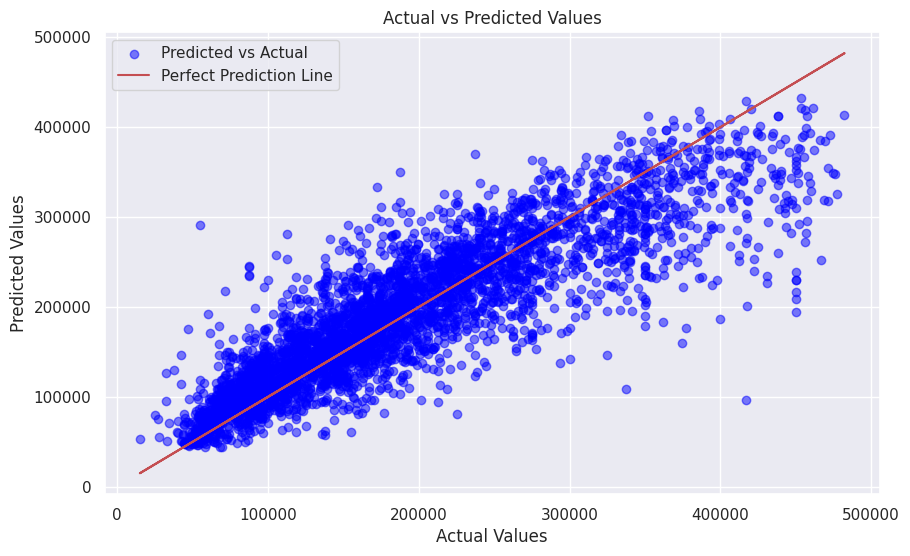

In [111]:
# visualizing actual VS predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_gbr_test, c="blue", alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

####ada boosting

In [47]:
#fitting the model

ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=42)
ada.fit(X_train, y_train)

#predicitng with model

pred_ada_train = ada.predict(X_train)
pred_ada_test = ada.predict(X_test)

#calculating metrics

rmse_train = np.sqrt(mean_squared_error(y_train, pred_ada_train))
r2_train = r2_score(y_train, pred_ada_train)

rmse_test = np.sqrt(mean_squared_error(y_test, pred_ada_test))
r2_test = r2_score(y_test, pred_ada_test)

#printing scores

print(f"rmse train: {rmse_train}")
print(f"r2 train: {r2_train}")
print('----------------------------')
print('----------------------------')
print(f"rmse test: {rmse_test}")
print(f"r2 test: {r2_test}")

rmse train: 2385.443337072266
r2 train: 0.9993732804279413
----------------------------
----------------------------
rmse test: 43723.24497434264
r2 test: 0.7917741158160014


In [51]:
# Define the parameter grid
base_estimator = DecisionTreeRegressor()

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [3, 5, 7, 9],
    'estimator__min_samples_split': [2, 5, 10]
}


In [52]:
# Initialize GridSearchCV
ada_grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)

# Fit the GridSearchCV
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                         random_state=42),
             param_grid={'estimator__max_depth': [3, 5, 7, 9],
                         'estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [53]:
# Retrieve best parameters and best estimator
ada_best_params = ada_grid.best_params_
ada_best_model = ada_grid.best_estimator_

In [54]:
# Evaluate best model
ada_best_model_score = ada_best_model.score(X_test, y_test)

In [55]:
# Predict with the best model
pred_ada_best = ada_best_model.predict(X_test)

In [56]:
# Define statistics
mse = mean_squared_error(y_test, pred_ada_best)
r2 = r2_score(y_test, pred_ada_best)
rmse = np.sqrt(mse)

In [57]:
#observing statistics
print("(MSE) Mean Squared Error:", mse)
print("(RMSE) Root of Mean Squared Error:", rmse)
print("R-squared (R²):", r2)

(MSE) Mean Squared Error: 2135730450.0760746
(RMSE) Root of Mean Squared Error: 46213.96379965772
R-squared (R²): 0.767375002118869


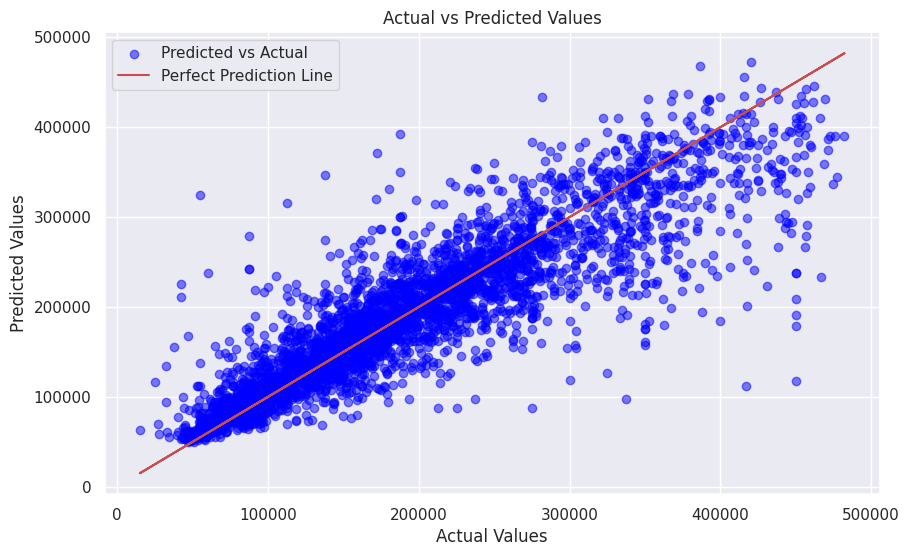

In [58]:
# visualizing actual VS predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_ada_test, c="blue", alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()